In [162]:
# 환경오염
# -*- coding: utf-8 -*-

from bs4 import BeautifulSoup
from datetime import datetime
import numpy as np
import requests
import pandas as pd
from pandas import DataFrame
import re

In [163]:
RESULT_PATH = './'
title_text=[]
link_text=[]
contents_text=[]
result={}

In [164]:
def contents_cleansing(contents):
    first_cleansing_contents = re.sub('<dl>.*?</a> </div> </dd> <dd>', '', 
                                      str(contents)).strip()  #앞에 필요없는 부분 제거
    second_cleansing_contents = re.sub('<ul class="relation_lst">.*?</dd>', '', 
                                       first_cleansing_contents).strip()#뒤에 필요없는 부분 제거 (새끼 기사)
    third_cleansing_contents = re.sub('<.+?>', '', second_cleansing_contents).strip()
    contents_text.append(third_cleansing_contents)

In [165]:
def crawler(maxpage,query,sort,s_date,e_date):

    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1  
    maxpage_t = (int(maxpage)-1)*10+1
    
    while page <= maxpage_t:
        url = "https://search.naver.com/search.naver?where=post&sm=tab_jum&query=" + query + "&sort="+sort+"&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        
        response = requests.get(url)
        html = response.text
 
        soup = BeautifulSoup(html, 'html.parser')
 
        atags = soup.select('._sp_each_title')
        for atag in atags:
            title_text.append(atag.text)     #제목
            link_text.append(atag['href'])   #링크주소        
    
        contents_lists = soup.select('ul.type01 dl')
        for contents_list in contents_lists:
            contents_cleansing(contents_list)
        
        result= {"title":title_text ,"contents": contents_text ,"link":link_text }  
        print(page)
        
        df = pd.DataFrame(result)
        page += 10
        
    outputFileName = 'data.xlsx'
    df.to_excel(RESULT_PATH+outputFileName, sheet_name='sheet1')
             

In [166]:
def main():
    info_main = input("="*50+"\n"+"입력 형식에 맞게 입력해주세요."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    
    maxpage = input("최대 크롤링할 페이지 수 입력하시오: ")  
    query = input("검색어 입력: ")  
    sort = input("뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): ")
    s_date = input("시작날짜 입력(2019.01.04):")
    e_date = input("끝날짜 입력(2019.01.05):")
    
    crawler(maxpage,query,sort,s_date,e_date) 
    
main()

입력 형식에 맞게 입력해주세요.
 시작하시려면 Enter를 눌러주세요.
최대 크롤링할 페이지 수 입력하시오: 100
검색어 입력: 환경오염
뉴스 검색 방식 입력(관련도순=0  최신순=1  오래된순=2): 0
시작날짜 입력(2019.01.04):2017.01.01
끝날짜 입력(2019.01.05):2020.01.01
1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991


In [167]:
Data = pd.read_excel(RESULT_PATH+'data.xlsx')
Data.head()

,Unnamed: 0,title,contents,link
0,0,지금 세계는 환경오염과 전쟁 중,"지금 세계는 환경오염과 전쟁 중 2019.09.20. 이상기후, 해수면 상승으로 ...",https://blog.naver.com/nibr_bio?Redirect=Log&l...
1,1,플라스틱과 환경오염에 관하여,플라스틱과 환경오염에 관하여 2019.11.13. '플라스틱으로 인류가 멸망 할 ...,https://blog.naver.com/baksabin?Redirect=Log&l...
2,2,"깨끗한 지구, 환경오염 예방을 위한 몇 가지 방법","깨끗한 지구, 환경오염 예방을 위한 몇 가지 방법 2018.06.30. 환경오염을...",https://blog.naver.com/leeandarchi?Redirect=Lo...
3,3,환경오염의 종류와 환경을 보호해야 하는 이유,환경오염의 종류와 환경을 보호해야 하는 이유 2019.06.14. 이유와 환경을 ...,http://blog.korad.or.kr/221561725140
4,4,"심각해지는 환경오염, 미래세대를 위해 필요한 환경교육은?...","심각해지는 환경오염, 미래세대를 위해 필요한 환경교육은?... 2019.11.06....",https://ebsstory.blog.me/221693758989


In [220]:
data = []
for i in Data.contents:
    data.append(i)
data

['지금 세계는 환경오염과 전쟁 중 2019.09.20.  이상기후, 해수면 상승으로 인한 삶의 터전 침수 등 환경오염은 더 이상 묵인할 수... 대기오염 물질 배출 사업장에 대한 관리를 지속하고 있으며, 환경부와 수도권은...   국립생물자원관 공식 blog.naver.com/nibr_... 블로그 내 검색',
 "플라스틱과 환경오염에 관하여 2019.11.13.  '플라스틱으로 인류가 멸망 할 수도 있겠다.' 그래서 환경 오염과 재활용에... 하지만 그 편안함에 익숙해져 오염에 대한 부분은 간과했고, 그 결과가 인류에게...   박을남과 이갑녀의 ... blog.naver.com/baksabin/221707043152 블로그 내 검색",
 '깨끗한 지구, 환경오염 예방을 위한 몇 가지 방법 2018.06.30.  환경오염을 줄이기 위한 몇 가지 작은 실천 얼마 전 일어났던 플라스틱 수거... 등 환경을 오염시키는 유해물질이 가득합니다. 정부에서는 자동차의 이용을 줄이고자...   리엔_건축전문블로그 blog.naver.com/leeandarchi/221309216328',
 '환경오염의 종류와 환경을 보호해야 하는 이유 2019.06.14.  이유와 환경을 보호하는 방법에 대해 알아보도록 하겠습니다! 환경오염의 종류 환경오염의 종류 하천, 호수, 바다 등의 자연 수역에 문명사회로부터 배출된 오염물질...   한국원자력환경공단(KORAD) 공식 blog.korad.or.kr/221... 블로그 내 검색',
 '심각해지는 환경오염, 미래세대를 위해 필요한 환경교육은?... 2019.11.06.  필요한 환경교육은?&gt; 포인트 ① 경제 성장에 가려진 환경오염의 현실 OECD 국가 중 초미세먼지 오염도 2위, 바로 대한민국입니다. 불과 10년 전만 하더라도 초미세먼지에...   EBS 스토리 공식 ebsstory.blog.me/221... 블로그 내 검색',
 '환경오염 대란 재활용 쓰레기 2018.06.07.  홍수에 밀려오는 쓰레기로 호수가 오염되고, 중국

In [221]:
from konlpy.tag import Kkma
kkma = Kkma()
n = []
for i in data:
    n.append(kkma.nouns(i))
n

[['지금',
  '세계',
  '환경오염',
  '전쟁',
  '중',
  '2019.09',
  '20',
  '이상',
  '이상기후',
  '기후',
  '해수면',
  '상승',
  '삶',
  '터전',
  '침수',
  '등',
  '환경',
  '오염',
  '묵인',
  '수',
  '대기',
  '대기오염',
  '물질',
  '배출',
  '사업장',
  '관리',
  '지속',
  '환경부',
  '수도권',
  '국립',
  '국립생물자원관',
  '생물',
  '자원',
  '관',
  '공식',
  '로그',
  '내',
  '검색'],
 ['플라스틱',
  '환경오염',
  '2019.11',
  '13',
  '인류',
  '멸망',
  '수',
  '환경',
  '오염',
  '재활용',
  '편안',
  '부분',
  '간과',
  '결과',
  '박',
  '남과',
  '갑',
  '갑녀의',
  '녀의',
  '221707043152',
  '로그',
  '내',
  '검색'],
 ['지구',
  '환경오염',
  '예방',
  '가지',
  '방법',
  '2018.06',
  '30',
  '실천',
  '얼마',
  '전',
  '플라스틱',
  '수거',
  '등',
  '환경',
  '오염',
  '유해',
  '유해물질',
  '물질',
  '정부',
  '자동차',
  '이용',
  '리',
  '건축',
  '건축전문',
  '전문',
  '로그',
  '221309216328'],
 ['환경오염',
  '종류',
  '환경',
  '보호',
  '이유',
  '2019.06',
  '14',
  '방법',
  '오염',
  '하천',
  '호수',
  '바다',
  '등',
  '자연',
  '수역',
  '문명',
  '문명사회',
  '사회',
  '배출',
  '오염물질',
  '물질',
  '한국',
  '한국원자력환경공단',
  '원자력',
  '공단',
  '공식',
  '221',
  '로그'

In [222]:
pre=[]
for i in range(0, len(n)) :
    text=" ".join(n[i])
    pre.append(text)
print(pre)
    

['지금 세계 환경오염 전쟁 중 2019.09 20 이상 이상기후 기후 해수면 상승 삶 터전 침수 등 환경 오염 묵인 수 대기 대기오염 물질 배출 사업장 관리 지속 환경부 수도권 국립 국립생물자원관 생물 자원 관 공식 로그 내 검색', '플라스틱 환경오염 2019.11 13 인류 멸망 수 환경 오염 재활용 편안 부분 간과 결과 박 남과 갑 갑녀의 녀의 221707043152 로그 내 검색', '지구 환경오염 예방 가지 방법 2018.06 30 실천 얼마 전 플라스틱 수거 등 환경 오염 유해 유해물질 물질 정부 자동차 이용 리 건축 건축전문 전문 로그 221309216328', '환경오염 종류 환경 보호 이유 2019.06 14 방법 오염 하천 호수 바다 등 자연 수역 문명 문명사회 사회 배출 오염물질 물질 한국 한국원자력환경공단 원자력 공단 공식 221 로그 내 검색', '심각 심각해지 해지 환경오염 미래 미래세대 세대 필요 환경 환경교육 교육 2019.11 06 포인트 경제 성장 오염 현실 국가 중 초미세 초미세먼지 먼지 오염도 2 2위 위 대한 대한민국 민국 10 10년 년 전 스토리 공식 221 로그 내 검색', '환경오염 대란 재활용 쓰레기 2018.06 07 홍수 호수 오염 중국 해안가 환경 초래 해결 방안 재활 재활용품 용품 국립 국립생태 생태 로그 공식 22129 내 검색', '쿠팡 쿠팡1위 1 위 차지 비데 물 물티슈 티슈 환경오염 걱정 올 올담 담 2019.12 25 요즘 사용 후 캡 외부 환경 변질 수 낭 쁘 1030 221748967894 로그 내 검색', '환경오염 세계 이색 세금 2019.03 20 지구 걱정 스토니 스토니아 아 방귀 방귀세 세 2009 2009년 년 소 목장 환경 환경보호 보호 국세청 로그 아름 공식 내 검색', '미군 미군기지 기지 반환 환경오염 문제 방위 방위비협상카드 비 협상 카드 사용 2019.12 12 때문 환경오염법 법 처리 일 환경 환경법 국내 대기 대기오염 오염 수질 수질오염 토양 토양오염 소음 진동 악취

In [223]:
nouns=[]
for i in pre :
    tok=re.sub("[\d]+",'',i)
    nouns.append(tok)
print(nouns)

['지금 세계 환경오염 전쟁 중 .  이상 이상기후 기후 해수면 상승 삶 터전 침수 등 환경 오염 묵인 수 대기 대기오염 물질 배출 사업장 관리 지속 환경부 수도권 국립 국립생물자원관 생물 자원 관 공식 로그 내 검색', '플라스틱 환경오염 .  인류 멸망 수 환경 오염 재활용 편안 부분 간과 결과 박 남과 갑 갑녀의 녀의  로그 내 검색', '지구 환경오염 예방 가지 방법 .  실천 얼마 전 플라스틱 수거 등 환경 오염 유해 유해물질 물질 정부 자동차 이용 리 건축 건축전문 전문 로그 ', '환경오염 종류 환경 보호 이유 .  방법 오염 하천 호수 바다 등 자연 수역 문명 문명사회 사회 배출 오염물질 물질 한국 한국원자력환경공단 원자력 공단 공식  로그 내 검색', '심각 심각해지 해지 환경오염 미래 미래세대 세대 필요 환경 환경교육 교육 .  포인트 경제 성장 오염 현실 국가 중 초미세 초미세먼지 먼지 오염도  위 위 대한 대한민국 민국  년 년 전 스토리 공식  로그 내 검색', '환경오염 대란 재활용 쓰레기 .  홍수 호수 오염 중국 해안가 환경 초래 해결 방안 재활 재활용품 용품 국립 국립생태 생태 로그 공식  내 검색', '쿠팡 쿠팡위  위 차지 비데 물 물티슈 티슈 환경오염 걱정 올 올담 담 .  요즘 사용 후 캡 외부 환경 변질 수 낭 쁘   로그 내 검색', '환경오염 세계 이색 세금 .  지구 걱정 스토니 스토니아 아 방귀 방귀세 세  년 년 소 목장 환경 환경보호 보호 국세청 로그 아름 공식 내 검색', '미군 미군기지 기지 반환 환경오염 문제 방위 방위비협상카드 비 협상 카드 사용 .  때문 환경오염법 법 처리 일 환경 환경법 국내 대기 대기오염 오염 수질 수질오염 토양 토양오염 소음 진동 악취 등 보건 보건위생상의 위생 상의 위 소 소망 망 강단   로그 내 검색', '지구의 날 환경 환경오염 오염 문제 심각 .  이 양의 물질 배출 지구 자연 자연보호자 보호자 제정 보호 행정 행정공제회 공제회 공식 로그 내 검색', '세계 일 최악 환

In [224]:
import glob
from afinn import Afinn
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[\w]+')
stopwords= ["검색","로그","오염","환경","내","공식","블로그","환경오염"]

In [225]:
count = {}   #동시출현 빈도가 저장될 dict
for line in nouns:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stopwords+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b: 
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1     
print(stopped_tokens2)

['순위', '공기', '다양성', '부하', '상태', '대기', '수질', '종다양성', '분야', '평가', '성경', '환경오염상태', '만점', '한국', '노력', '환경부하']


In [226]:
df=pd.DataFrame.from_dict(count, orient='index')

list1=[]
for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
print(df2)
df3=df2.sort_values(by=['freq'],ascending=False)
df3_pos=df3.reset_index(drop=True)
df3.head(20)

       term1 term2  freq
0        수도권    전쟁     1
1         전쟁    터전     1
2         세계    전쟁     2
3         전쟁    침수     1
4         관리    전쟁     1
...      ...   ...   ...
183914    만점    한국     1
183915    노력    만점     1
183916    만점  환경부하     1
183917    한국  환경부하     1
183918    노력  환경부하     1

[183919 rows x 3 columns]


,term1,term2,freq
235,물질,배출,187
3838,물질,환경오염물질,131
6186,행위,환경오염행위,122
4287,배출,환경오염물질,118
538,물질,오염물질,114
7488,물질,행위,113
6178,특별,행위,110
11700,물질,특별,109
266,물질,사업장,100
236,배출,사업장,95


In [245]:
import networkx as nx
import operator

G_pos=nx.Graph()

for i in range((len(np.where(df3_pos['freq']>20)[0]))):
    G_pos.add_edge(df3_pos['term1'][i], df3_pos['term2'][i], weight=int(df3_pos['freq'][i]))

dgr = nx.degree_centrality(G_pos)
btw = nx.betweenness_centrality(G_pos)
cls = nx.closeness_centrality(G_pos)
egv = nx.eigenvector_centrality(G_pos)

In [246]:
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
print("** degree **")
for x in range(10):
    print(sorted_dgr[x])

** degree **
('물질', 0.7313432835820896)
('배출', 0.6417910447761194)
('특별', 0.582089552238806)
('행위', 0.5373134328358209)
('감시', 0.3880597014925373)
('환경오염행위', 0.3731343283582089)
('환경오염물질', 0.3582089552238806)
('연휴', 0.34328358208955223)
('실시', 0.31343283582089554)
('오염물질', 0.29850746268656714)


In [247]:
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
print("** betweenness **")
for x in range(10):
    print(sorted_btw[x])

** betweenness **
('물질', 0.23782808979552533)
('배출', 0.13332032558626858)
('특별', 0.12316358574838901)
('행위', 0.06311746823958493)
('관리', 0.027871801548870746)
('수질', 0.027710718348438836)
('시설', 0.02705555914511138)
('대기', 0.026383235338459217)
('환경오염물질', 0.024251128287763296)
('연휴', 0.0211664987105964)


In [248]:
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
print("** closeness **")
for x in range(10):
    print(sorted_cls[x])

** closeness **
('물질', 0.7529742591390872)
('배출', 0.6927363184079601)
('특별', 0.6494402985074628)
('행위', 0.6259665527782773)
('감시', 0.5527151476659257)
('환경오염물질', 0.5468970934799686)
('환경오염행위', 0.541200248756219)
('연휴', 0.5356208647484227)
('실시', 0.5248002412181516)
('오염물질', 0.5195522388059701)


In [249]:
sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
print("** eigenvector **")
for x in range(10):
    print(sorted_egv[x])

** eigenvector **
('물질', 0.2941557025655191)
('배출', 0.28509984639168207)
('특별', 0.27159514387517036)
('행위', 0.26823733888799406)
('감시', 0.22891354038224068)
('환경오염행위', 0.2247649853278074)
('실시', 0.21099576328361935)
('연휴', 0.20944366024859765)
('환경오염물질', 0.20772243223128656)
('오염물질', 0.2052565890231737)


In [250]:
G = nx.Graph()

for i in range(len(sorted_cls)):
    G.add_node(sorted_cls[i][0], nodesize=sorted_dgr[i][1])

In [251]:
for i in range((len(np.where(df3_pos['freq']>20)[0]))):
    G.add_weighted_edges_from([(df3_pos['term1'][i], df3_pos['term2'][i],int(df3_pos['freq'][i]))])

In [252]:
sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

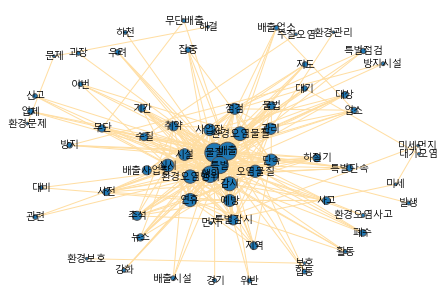

In [253]:
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=50),font_family=font_name,font_size=10, **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()